In [1]:
import torch 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from ResNet import ResNet
from backup import ImageTransform

In [2]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
class SingleImage(object):

    def __init__(self):
        self.models_list = [] 


    def add_model(self, model_path):
        model = ResNet()
        model.load_state_dict(torch.load(model_path, map_location='cpu'))
        self.models_list.append(model)


    def add_multiple(self, models_path):
        names_list = os.listdir(models_path)
        paths_list = [os.path.join(models_path, x) for x in names_list]

        for i in paths_list : 
            if i.endswith('.pt'):
                model = ResNet()
                model.load_state_dict(torch.load(i, map_location='cpu'))
                self.models_list.append(model)


    def deprocess(self,img):
        img = img.clamp(0,255).detach().numpy()
        img = img.transpose(1,2,0).astype('uint8')
        img = Image.fromarray(img)
        return img


    def convert(self, input_img_path, size_threshold=600): 
        input_img = Image.open(input_img_path).convert('RGB')
        h, w = input_img.size 

        while h > size_threshold or w > size_threshold : 
            h = int(h // 1.2)
            w = int(w // 1.2)

        input_img = input_img.resize((h,w)) 

        model_input = transforms.ToTensor()(input_img).unsqueeze(0)
        outputs = []
        plt.figure(figsize=(12,9))
        plt.imshow(input_img)

        for model in self.models_list : 
            out = model.forward(model_input)
            img = self.deprocess(out[0])
            plt.figure(figsize=(12,9))
            plt.imshow(img)

In [4]:
show = SingleImage()
show.add_model('/users/gursi/downloads/model.pt')

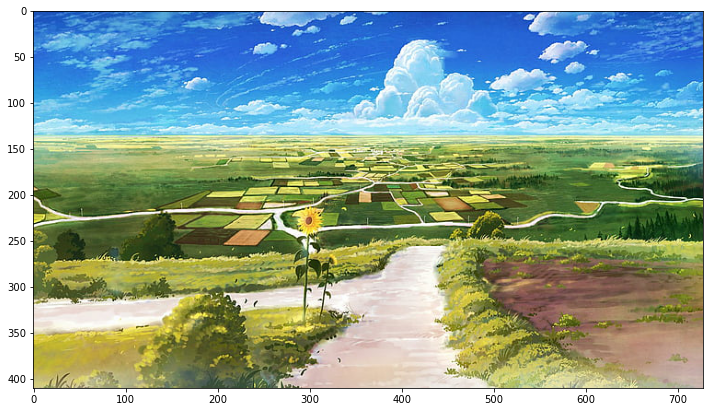

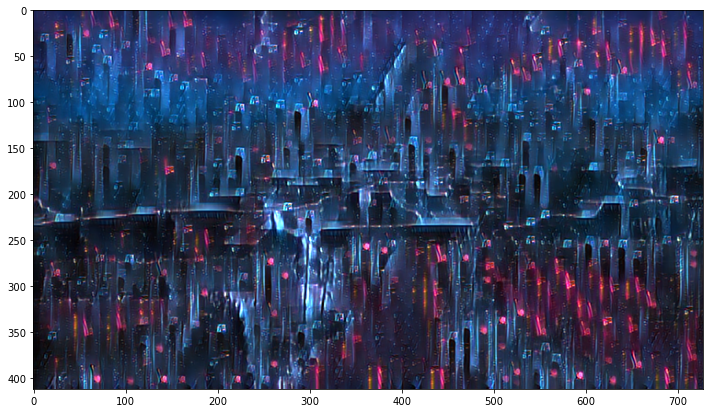

In [10]:
show.convert('/users/gursi/desktop/anime.jpg', size_threshold=1200)